# LAB 3.2: Unsupervised Learning

**Temat:** Clustering i PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

np.random.seed(42)
print('✓ Setup complete')

✓ Setup complete


## CZĘŚĆ 1: K-Means Clustering 

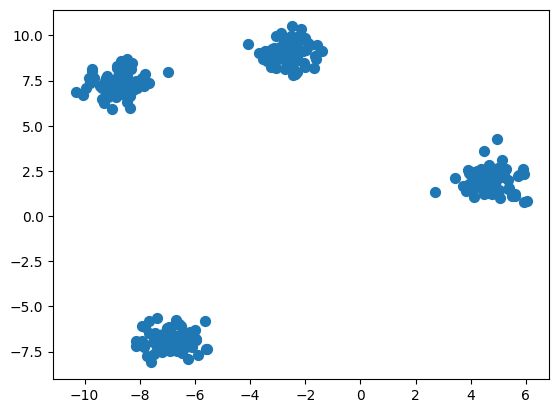

In [2]:
# Generowanie danych syntetycznych
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.60)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50)
plt.show()

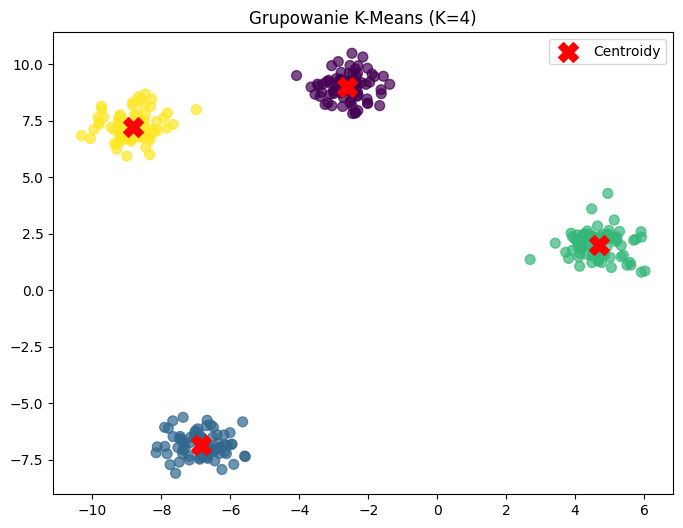

In [3]:
# TODO: Zastosuj K-Means dla 4 klastrów
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_blobs)

# TODO: Pobierz etykiety (labels_) i centra klastrów (cluster_centers_)
labels = kmeans.labels_          
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroidy')
plt.title('Grupowanie K-Means (K=4)')
plt.legend()
plt.show()

### Zadanie 1.1: Elbow Method (Metoda Łokcia)

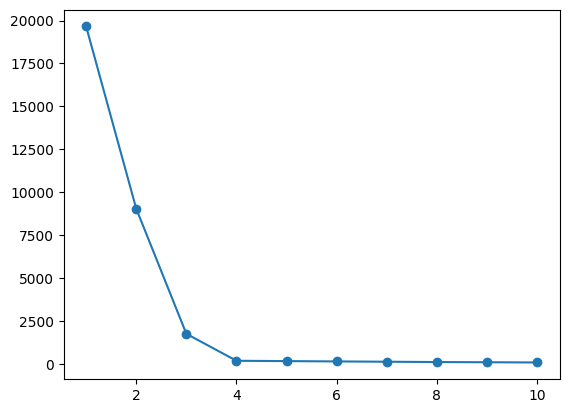

In [4]:
# TODO: Oblicz 'inertia' dla K od 1 do 10 i narysuj wykres
inertias = []
K_range = range(1, 11)

for k in K_range:
    # TODO: Trenuj KMeans i dodaj inertia_ do listy

    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_blobs)
    inertias.append(km.inertia_)
plt.plot(K_range, inertias, marker='o')

## CZĘŚĆ 2: Inne metody (DBSCAN, Hierarchical)

In [5]:
# TODO: Przetestuj DBSCAN (dobierz eps i min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_blobs)

agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_blobs)

## CZĘŚĆ 3: PCA - Redukcja Wymiarowości

In [6]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# TODO: Zredukuj wymiary do 2 używając PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

print(f'Procent zachowanej wariancji: {np.sum(pca.explained_variance_ratio_):.2f}')

Procent zachowanej wariancji: 0.98


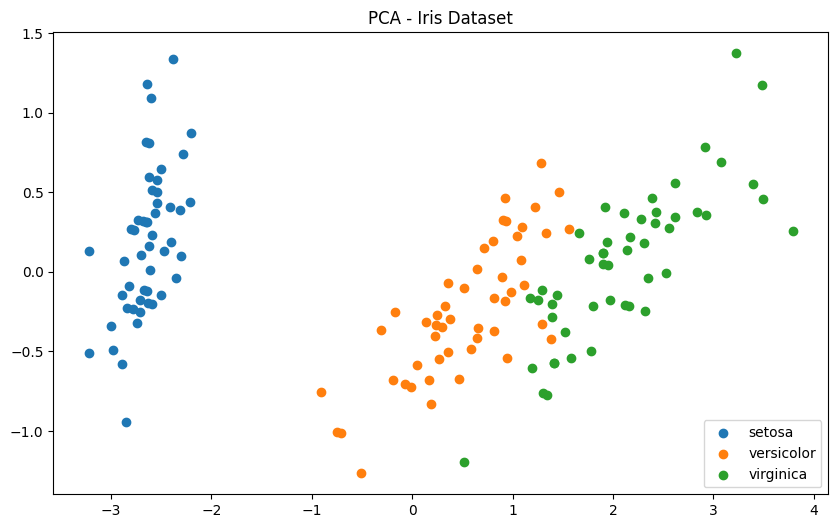

In [7]:
# Wizualizacja wyników PCA
if X_pca is not None:
    plt.figure(figsize=(10, 6))
    for i, name in enumerate(iris.target_names):
        mask = y_iris == i
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=name)
    plt.legend()
    plt.title('PCA - Iris Dataset')
    plt.show()

## CZĘŚĆ 4: t-SNE

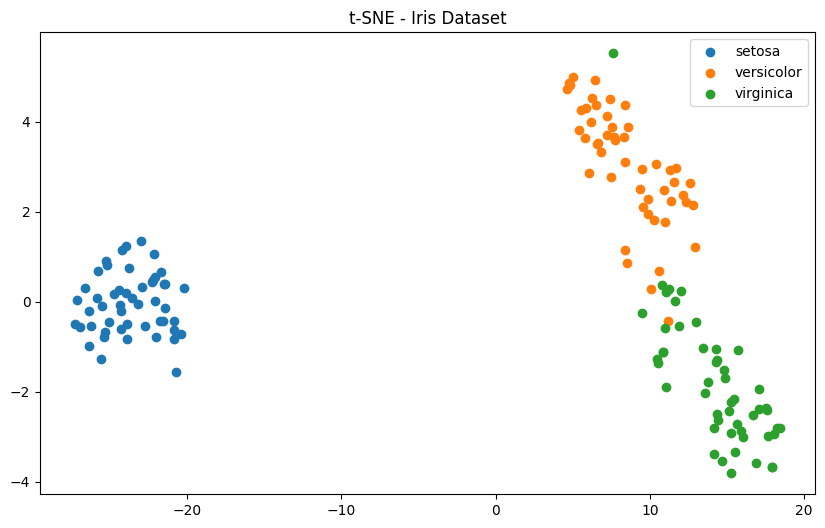

In [8]:
# TODO: Zastosuj t-SNE do wizualizacji zbioru Iris w 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_iris)

plt.figure(figsize=(10, 6))
for i, name in enumerate(iris.target_names):
    mask = y_iris == i
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=name)
plt.legend()
plt.title('t-SNE - Iris Dataset')
plt.show()

Wnioski: pierwszy kontakt z Unsupervised Learning, który pozwolił na zrozumienie odkrywania wzorów w danych bez etykiet. Przy wykorzystaniu algorytmu K-Means możemy automatycznie zklastrować dane, a metoda łokcia pomaga ustalić optymalną liczbę klastrów. 